# Calculation of Mortality Rate – Demographic Flow Method  
*(Argentina example — reverse-engineering deaths from population balances)*

## 1. Core idea
Population changes from births, migration and deaths:

$$
P_{t+1} = P_t + \text{Births}_t + \text{Immigration}_t - \text{Emigration}_t - \text{Deaths}_t
$$

## 2. Solve for deaths
Rearrange to estimate deaths:

$$
\text{Deaths}_t = P_t + \text{Births}_t + \text{Immigration}_t - \text{Emigration}_t - P_{t+1}
$$

(Plug observed P, births and migration for the year t.)

## 3. Crude death rate (per 1,000)
Use mid-year population (approx.):

$$
\text{CDR}_t = \frac{\text{Deaths}_t}{(P_t+P_{t+1})/2}\times 1000
$$

## 4. Why it works for Argentina (brief)
- INDEC publishes annual population and births.  
- Migration estimates + population totals let you back-calculate deaths even when death registration is delayed.

![Untitled diagram-2025-11-20-120657.png](<attachment:Untitled diagram-2025-11-20-120657.png>)

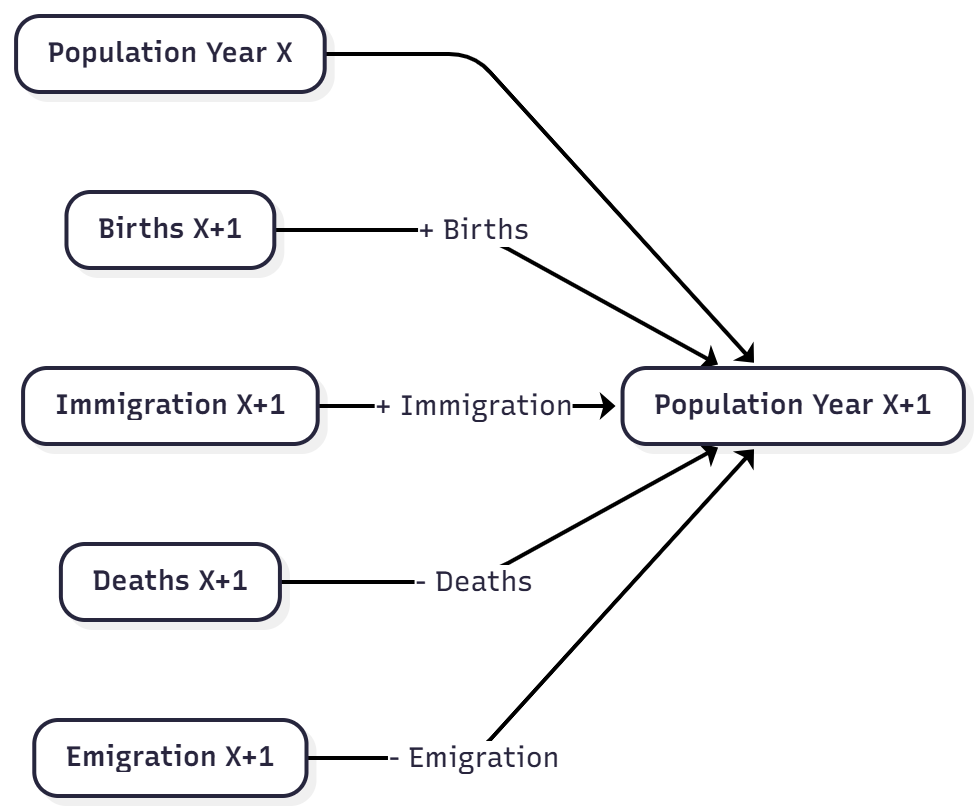

First of all we have to engineer the raw data for our purpose.

Our study focus is Mortality in Argentina between 2019-2024.

So we need
- Births between 2019-2024
- Total Population between 2019-2024
- Emigration between 2019-2024
- Immigration between 2019-2024

We have all that data so let's go ahead and get a dataframe with all that informatio united.

First of all, we want to reshape the data for our time period

Let's begin with Births

In [71]:
import csv
import pandas as pd
import numpy as np

In [72]:
df = pd.read_excel('dataset/nacimientos-2005-2023.xlsx', engine='openpyxl')

In [73]:
# We filter our desired year (2019-2023); we sort by Year; we reset indexes; We rename columns; We drop unnecesary column
births = df.loc[df['AÑO'] > 2018].sort_values(by='AÑO', ascending=True).reset_index(drop=True)
births = births.rename(columns={'AÑO': 'YEAR', 'NACIDOS_VIVOS_REGISTRADOS': 'BIRTHS'}).drop(['AREA'], axis = 1)


In [74]:
births.tail()

,YEAR,BIRTHS
0,2019,625441
1,2020,533299
2,2021,529794
3,2022,495295
4,2023,460902


Now let's keep going with Population

In [ ]:
df = pd.read_csv('dataset/poblacion-argentina-2005-2024.csv')

In [76]:
population = df.loc[df['Year'] > 2018].sort_values(by='Year', ascending=True).reset_index(drop=True)
population.rename(columns={'Year': 'YEAR', 'Total': 'POPULATION'})

,YEAR,POPULATION
0,2019,44973465
1,2020,45191965
2,2021,45312281
3,2022,45407904
4,2023,45538401
5,2024,45696159


Now lets begin with migrations

In [98]:
df_2 = pd.read_csv('dataset/migraciones-2019-2024.csv')
df_2.head()

,ANIO,ENTRADAS,SALIDAS,TOTAL
0,2019,34.413.753,34.522.066,68.935.819
1,2020,9.705.757,9.541.981,19.247.738
2,2021,3.110.402,3.347.356,6.457.758
3,2022,24.036.545,23.911.744,47.948.289
4,2023,37.118.359,36.522.139,73.640.498


In [103]:
df_2.columns = df_2.columns.str.strip()
migrations = df_2.rename(columns={
    'ANIO': 'YEAR',
    'ENTRADAS': 'IMMIGRATION',
    'SALIDAS': 'EMIGRATION',
    'TOTAL': 'TOTAL_MIGRATION'
})

migrations.head()


,YEAR,IMMIGRATION,EMIGRATION,TOTAL_MIGRATION
0,2019,34.413.753,34.522.066,68.935.819
1,2020,9.705.757,9.541.981,19.247.738
2,2021,3.110.402,3.347.356,6.457.758
3,2022,24.036.545,23.911.744,47.948.289
4,2023,37.118.359,36.522.139,73.640.498
